In [127]:
"""
Výpočet osvětlení v předozadní ose svítidla
"""
from numpy import array, linspace, arctan, cos, sqrt, power, zeros, degrees, multiply, pi, radians

import matplotlib.pyplot as pl

In [128]:
HEIGHT = 5  # lamp at point X=0, Z=LAMP_HEIGHT
X_AXIS = linspace(-5, 20)
ELEVATIONS_DEG = [0, 10, 20] # light elevation

In [129]:
def plot_curve(y_values, title="", ylabel=""):
    pl.plot(X_AXIS, y_values)
    pl.grid()
    pl.title(title)
    pl.xlabel("x[m]")
    pl.ylabel(ylabel)

In [130]:
# luminous intenzity I[cd] (cd = lm / sr)
def get_intenzity(angles: array) -> array:
    from light import Light
    from ldt_reader import LdtReader
    LDT_PATH = './ldt/portland/FLD153-D1.ldt'
    reader = LdtReader(LDT_PATH)
    light = Light(reader.azimuts, reader.elevations, reader.intenzities)
    intenzity = zeros(angles.shape)
    for i, angle in enumerate(angles):
        intenzity[i] = light.intenzity(0, degrees(angle))
    return intenzity

In [131]:
# vzdálenost k bodu
distances = sqrt(power(X_AXIS, 2) + HEIGHT**2)
#plot_curve(distances, ylabel="d[m]", title="Distance")

# úhel od kolmice k dopadu, 
angles = arctan(X_AXIS/HEIGHT)
#plot_curve(angles, ylabel="angle[rad]", title="Angles")

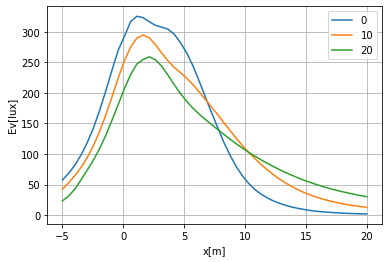

In [132]:
for elev_deg in ELEVATIONS_DEG:
    # lumminous intenzity [cd]
    intenzity = get_intenzity(angles - radians(elev_deg))
    # iluminance Ev[lux] = I * cos(b) / d^2
    angle_factor = cos(angles)
    distance_factor = 1/power(distances, 2)
    Ev = multiply(multiply(intenzity, angle_factor), distance_factor)
    #Ev = multiply(intenzity, distance_factor)
    # plot_curve(intenzity, title="Intenzity", ylabel="I[cd]")
    # plot_curve(distance_factor)
    plot_curve(Ev, title="", ylabel="Ev[lux]")
    pl.legend(ELEVATIONS_DEG)